In [31]:
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

X_train:(60000, 28, 28), X_test:(10000, 28, 28), y_train:(60000,), y_test:(10000,)


image shape: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 

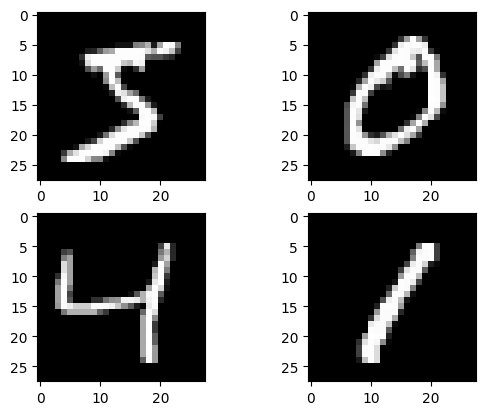

In [32]:
print('image shape:', X_train[0].shape)
print(X_train[0])

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [33]:
# Let's try an MLP, 
def baseline_model(num_pixels = 28*28, num_classes = 10):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    

net = baseline_model()
print(net.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 784)               615440    
                                                                 
 dense_45 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


image shape: (784,) min value: 0.0 max value: 1.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.   

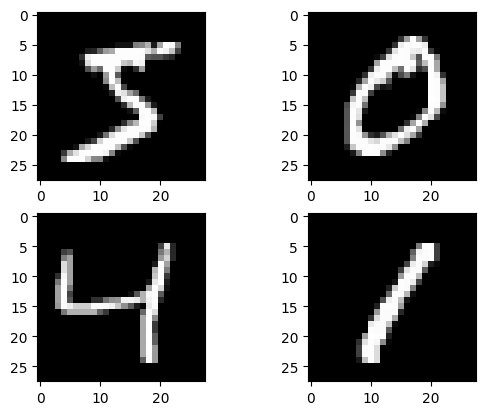

In [34]:
# data split and pre-processing
# 
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

print('image shape:', X_train[0].shape, 'min value:', min(X_train[0]), 'max value:', max(X_train[0]))
print(X_train[0])

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [35]:
print('original y: ', y_train.shape)
for i in range(5):
    print(f'y[{i}]: {y_train[i]}')

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print('num_classes:', num_classes)
print('categorial y: ', y_train.shape)

for i in range(5):
    print(f'y[{i}]: {y_train[i, :]}')

original y:  (60000,)
y[0]: 5
y[1]: 0
y[2]: 4
y[3]: 1
y[4]: 9
num_classes: 10
categorial y:  (60000, 10)
y[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y[1]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y[2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y[3]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y[4]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [36]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 2s - loss: 0.2752 - accuracy: 0.9230 - val_loss: 0.1307 - val_accuracy: 0.9627 - 2s/epoch - 5ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1086 - accuracy: 0.9683 - val_loss: 0.0906 - val_accuracy: 0.9743 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0707 - accuracy: 0.9797 - val_loss: 0.0763 - val_accuracy: 0.9758 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0672 - val_accuracy: 0.9778 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0359 - accuracy: 0.9901 - val_loss: 0.0698 - val_accuracy: 0.9769 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0275 - accuracy: 0.9925 - val_loss: 0.0612 - val_accuracy: 0.9809 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0611 - val_accuracy: 0.9797 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0613 - val_accuracy: 0.9817 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


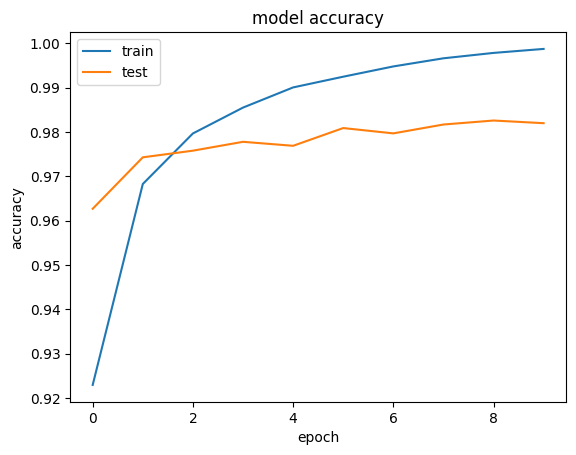

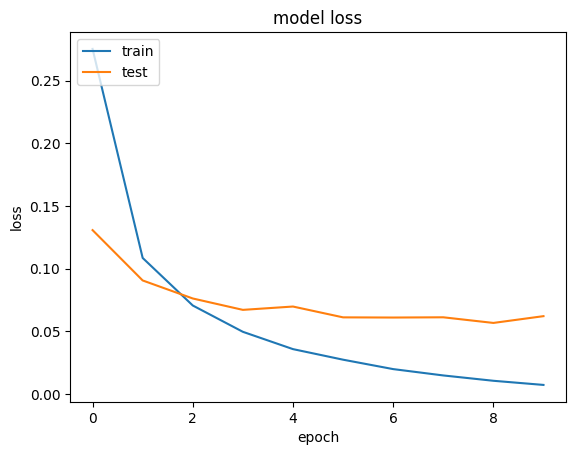

In [37]:
def plot_training_stat(history):
    # list all data in history
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_training_stat(history)

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# CNN models
# 
def cnn_baseline_model():
    # create model
    model = Sequential()
    
    # Feature extracting layers
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # intermediate feature outputs, flattens to form vectors, required for MLPs
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    # Decision layers- MLPs
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = cnn_baseline_model()
print('CNN model:', model)
print(model.summary())
print()
for layer in model.layers:
    print(layer)

CNN model: <keras.engine.sequential.Sequential object at 0x79bce5182140>
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_16 (Flatten)        (None, 4608)              0         
                                                                 
 dense_48 (Dense)            (None, 128)               589952    
                                                                 
 dense_49 (Dense)            (None, 10)       

In [39]:
# load data

# Unlike ANN/MLP, CNN can process multi-channel data, no need to flatten
# 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')



# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [40]:
# build the model
model = cnn_baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2276 - accuracy: 0.9357 - val_loss: 0.0766 - val_accuracy: 0.9774 - 4s/epoch - 12ms/step
Epoch 2/10
300/300 - 3s - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0512 - val_accuracy: 0.9832 - 3s/epoch - 11ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0482 - accuracy: 0.9845 - val_loss: 0.0415 - val_accuracy: 0.9860 - 3s/epoch - 12ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0333 - val_accuracy: 0.9887 - 4s/epoch - 12ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9890 - 4s/epoch - 13ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0345 - val_accuracy: 0.9883 - 5s/epoch - 17ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0327 - val_accuracy: 0.9897 - 5s/epoch - 17ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0329 - val_accuracy: 0.9895 - 5s/epoch - 16ms/step
Epoch 9/10
300/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


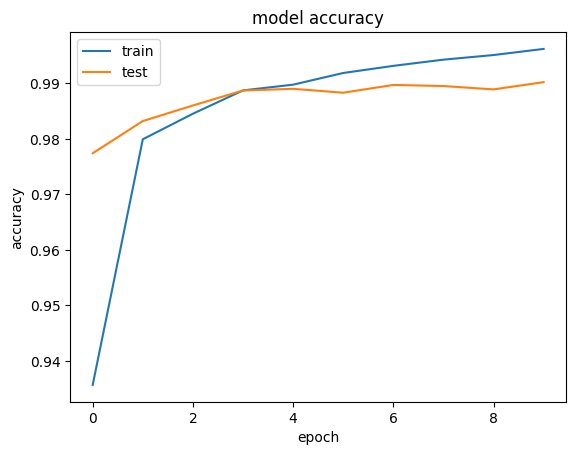

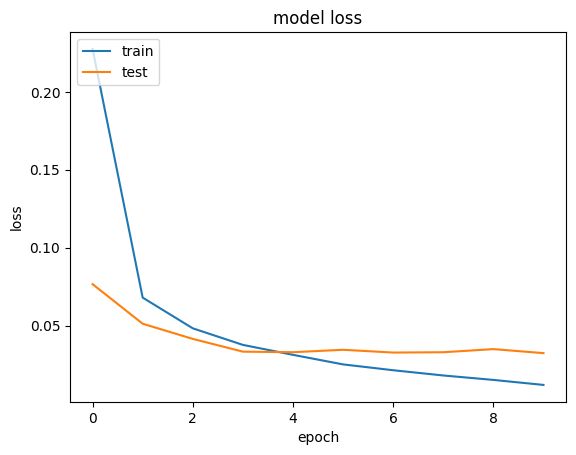

In [41]:
plot_training_stat(history)

In [42]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()

    # Feature extracting layers
    #  
    # Block 1 of conv-pooling
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Block 2 of conv-pooling
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #  ... Block N of conv-pooling (increasing complexity in feature extracting layer, you go deeper here...)
    
    # Flatten 2D feature matrix to feature vector, required for MLPs
    # 
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    # Decision layer MLP
    # 
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = larger_model()
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 5, 5, 15)          0         
                                                                 
 flatten_18 (Flatten)        (None, 375)             

Epoch 1/10
300/300 [==============================] - 4s 11ms/step - loss: 0.3813 - accuracy: 0.8820 - val_loss: 0.0870 - val_accuracy: 0.9716
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0971 - accuracy: 0.9705 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0719 - accuracy: 0.9774 - val_loss: 0.0432 - val_accuracy: 0.9854
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.0362 - val_accuracy: 0.9878
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0288 - val_accuracy: 0.9904
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0259 - val_accuracy: 0.9907
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0266 - val_accuracy: 0.9915

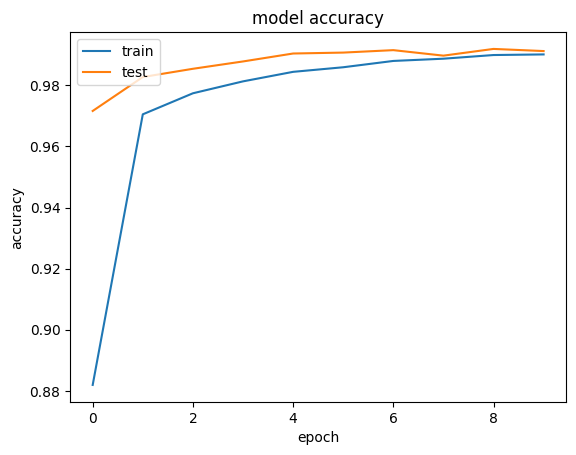

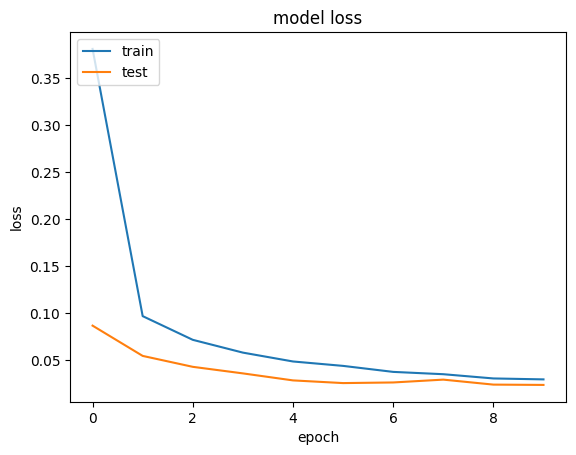

In [43]:

...
# build the model
model = larger_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

plot_training_stat(history)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    print(layer.name, len(layer.get_weights()))
    print("--", layer.get_weights()[0].shape, layer.get_weights()[1].shape) if len(layer.get_weights()) == 2 else None

# More resources
# 
* https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks